In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
from sklearn.model_selection import train_test_split

In [2]:
def format_output(data):
    y1 = data.pop('Y1')
    y1 = np.array(y1)
    y2 = data.pop('Y2')
    y2 = np.array(y2)
    return y1, y2

In [3]:
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']

In [4]:
def plot_diff(y_true, y_pred, title=''):
    plt.scatter(y_true, y_pred)
    plt.title(title)
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.axis('equal')
    plt.axis('square')
    plt.xlim(plt.xlim())
    plt.ylim(plt.ylim())
    plt.plot([-100, 100], [-100, 100])
    plt.show()


In [5]:
def plot_metrics(metric_name, title, ylim=5):
    plt.title(title)
    plt.ylim(0, ylim)
    plt.plot(history.history[metric_name], color='blue', label=metric_name)
    plt.plot(history.history['val_' + metric_name], color='green', label='val_' + metric_name)
    plt.show()

In [7]:
URL = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx'
df= pd.read_excel(URL)
df = df.sample(frac=1).reset_index(drop = True)

train, test = train_test_split(df, test_size=0.2)

In [8]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,3,0.10,4,24.23,25.72
1,0.74,686.0,245.0,220.50,3.5,5,0.40,1,14.55,17.25
2,0.82,612.5,318.5,147.00,7.0,2,0.25,2,25.74,28.27
3,0.90,563.5,318.5,122.50,7.0,2,0.10,2,28.88,32.54
4,0.64,784.0,343.0,220.50,3.5,4,0.25,5,16.76,20.19


In [9]:
train_stats = train.describe()

In [10]:
train_stats.pop('Y1')
train_stats.pop('Y2')

train_stats = train_stats.transpose()
train_y = format_output(train)
test_y = format_output(test)

norm_train_X = norm(train)
norm_test_X =norm(test)

In [12]:
input_layer = Input(shape=(len(train.columns), ))
first_dense = Dense(128, activation='relu')(input_layer)
second_dense = Dense(128, activation ='relu')(first_dense)

y1_output = Dense(1, name = 'y1_output')(second_dense)
third_dense = Dense(64, activation='relu')(second_dense)

y2_output = Dense(1, name = 'y2_output')(third_dense)

model = Model(inputs = [input_layer], outputs = [y1_output, y2_output])

print(model.summary())

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 128)          1152        input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 128)          16512       dense[0][0]                      
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 64)           8256        dense_1[0][0]                    
_______________________________________________________________________________________

In [13]:
from tensorflow.python.keras.utils.vis_utils import plot_model

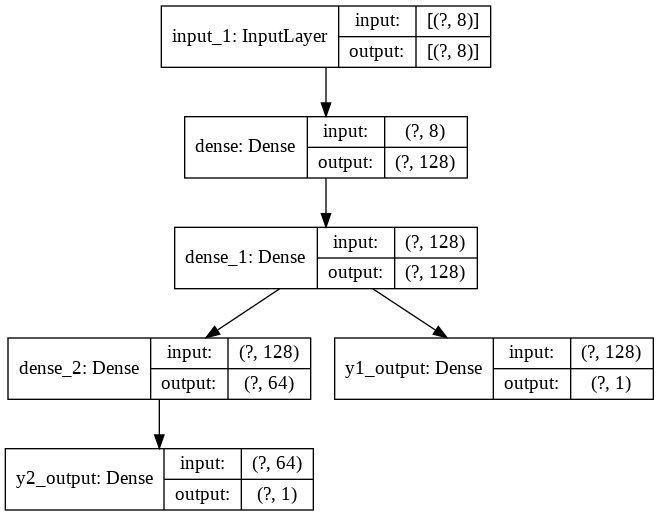

In [14]:
plot_model(model, show_layer_names=True, show_shapes=True)

In [15]:
optimizer = tf.keras.optimizers.SGD(lr = 0.001)
model.compile(optimizer=optimizer, loss = {
    'y1_output' : 'mse', 'y2_output' : 'mse'},
      metrics = {'y1_output' : tf.keras.metrics.RootMeanSquaredError(), 'y2_output' : tf.keras.metrics.RootMeanSquaredError()})

In [18]:
history = model.fit(norm_train_X, train_y,
                    epochs=500, batch_size=10, validation_data=(norm_test_X, test_y))

Epoch 1/500
62/62 [==============================] - 0s 5ms/step - loss: 228.0105 - y1_output_loss: 108.6957 - y2_output_loss: 119.3147 - y1_output_root_mean_squared_error: 10.4257 - y2_output_root_mean_squared_error: 10.9231 - val_loss: 53.6616 - val_y1_output_loss: 19.4108 - val_y2_output_loss: 34.2508 - val_y1_output_root_mean_squared_error: 4.4058 - val_y2_output_root_mean_squared_error: 5.8524
Epoch 2/500
62/62 [==============================] - 0s 2ms/step - loss: 28.2272 - y1_output_loss: 12.1466 - y2_output_loss: 16.0806 - y1_output_root_mean_squared_error: 3.4852 - y2_output_root_mean_squared_error: 4.0101 - val_loss: 33.2946 - val_y1_output_loss: 12.0919 - val_y2_output_loss: 21.2027 - val_y1_output_root_mean_squared_error: 3.4773 - val_y2_output_root_mean_squared_error: 4.6046
Epoch 3/500
62/62 [==============================] - 0s 2ms/step - loss: 26.7531 - y1_output_loss: 10.5663 - y2_output_loss: 16.1868 - y1_output_root_mean_squared_error: 3.2506 - y2_output_root_mean_sq

In [19]:
# Test the model and print loss and mse for both outputs
loss, Y1_loss, Y2_loss, Y1_rmse, Y2_rmse = model.evaluate(x=norm_test_X, y=test_y)
print("Loss = {}, Y1_loss = {}, Y1_mse = {}, Y2_loss = {}, Y2_mse = {}".format(loss, Y1_loss, Y1_rmse, Y2_loss, Y2_rmse))

5/5 [==============================] - 0s 2ms/step - loss: 1.2268 - y1_output_loss: 0.2499 - y2_output_loss: 0.9768 - y1_output_root_mean_squared_error: 0.4999 - y2_output_root_mean_squared_error: 0.9884
Loss = 1.226790189743042, Y1_loss = 0.24994835257530212, Y1_mse = 0.4999483525753021, Y2_loss = 0.9768416881561279, Y2_mse = 0.9883530139923096


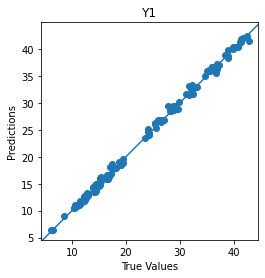

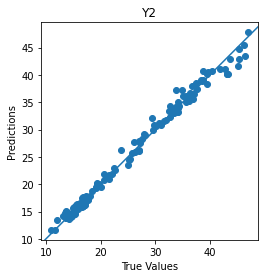

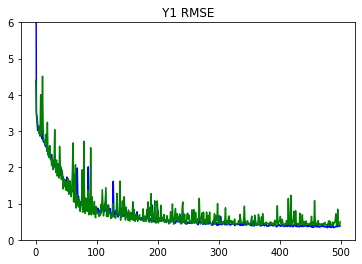

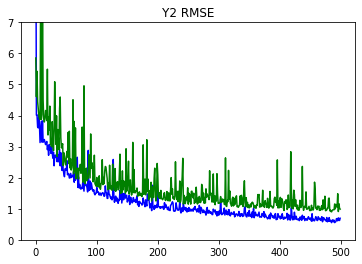

In [21]:
Y_pred = model.predict(norm_test_X)
plot_diff(test_y[0], Y_pred[0], title='Y1')
plot_diff(test_y[1], Y_pred[1], title='Y2')
plot_metrics(metric_name='y1_output_root_mean_squared_error', title='Y1 RMSE', ylim=6)
plot_metrics(metric_name='y2_output_root_mean_squared_error', title='Y2 RMSE', ylim=7)